De vraag die hier zal worden beantwoord is het volgende:

Welke soort misdaad komt nu het meest voor en zal dit in de toekomst ook zo blijven?
    

Om de vraag te kunnen beantwoorden moet de data eerst ingeladen worden, daarnaast zal er ook op de data gefilterd moeten worden zodat alleen de 'crime' data over blijft.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [4]:
crime = pd.read_csv('crime.csv')
codes = pd.read_csv('offense_codes.csv')
crime

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466835,2019760688,2019760688230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,11/30/2019 12:01:00 AM,11/30/2019 11:59:00 PM,12/2/2019 9:46:00 AM,7604 E 28TH AVE,3168830.0,1700705.0,-104.899517,39.755709,5,512,stapleton,1,0
466836,2019766601,2019766601410400,4104,0,liquor-possession,drug-alcohol,12/4/2019 8:35:00 PM,NaN,12/4/2019 11:17:00 PM,2000 BLOCK E COLFAX AVE,3150981.0,1694664.0,-104.963127,39.739432,6,622,cheesman-park,1,0
466837,2019815611,2019815611542000,5420,0,traffic-accident-dui-duid,traffic-accident,12/28/2019 8:27:00 PM,NaN,12/28/2019 8:27:00 PM,1200 BLK S QUIVAS ST,3138889.0,1677970.0,-105.006446,39.693792,4,422,ruby-hill,0,1
466838,2019732485,2019732485501600,5016,0,violation-of-restraining-order,all-other-crimes,11/16/2019 5:20:00 PM,NaN,11/17/2019 4:52:00 PM,1717 CHAMPA ST,3142649.0,1697692.0,-104.992694,39.747876,6,611,cbd,1,0


Omdat we willen weten om welke crimes het gaat moeten we de offense codes met de crimes matchen, dit kan gedaan worden door middel van een merge.

In [5]:
crime_and_codes = pd.merge(crime, codes, on= 'OFFENSE_CODE')
crime_and_codes

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION_x,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_CODE_EXTENSION_y,OFFENSE_TYPE_ID_y,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID_y,OFFENSE_CATEGORY_NAME,IS_CRIME_y,IS_TRAFFIC_y
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,...,montbello,1,0,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,all-other-crimes,All Other Crimes,1,0
1,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,...,montbello,1,0,1,weapon-flourishing,Flourishing of a weapon,all-other-crimes,All Other Crimes,1,0
2,201872599,201872599521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,NaN,1/30/2018 10:14:00 PM,12900 BLOCK E ANDREWS DR,...,montbello,1,0,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,all-other-crimes,All Other Crimes,1,0
3,201872599,201872599521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,NaN,1/30/2018 10:14:00 PM,12900 BLOCK E ANDREWS DR,...,montbello,1,0,1,weapon-flourishing,Flourishing of a weapon,all-other-crimes,All Other Crimes,1,0
4,201866465,201866465521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 1:30:00 PM,1/28/2018 1:30:00 PM,1/28/2018 4:26:00 PM,14000 BLK E MAXWELL PL,...,montbello,1,0,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,all-other-crimes,All Other Crimes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181904,2016245433,2016245433399000,3990,0,gambling-betting-wagering,white-collar-crime,4/20/2016 4:30:00 PM,NaN,4/20/2016 7:08:00 PM,1499 N BROADWAY ST,...,civic-center,1,0,0,gambling-betting-wagering,Gambling - betting or wagering,white-collar-crime,White Collar Crime,1,0
1181905,2019356360,2019356360399000,3990,0,gambling-betting-wagering,white-collar-crime,6/7/2019 6:40:00 PM,NaN,6/7/2019 7:30:00 PM,1400 BLOCK N BROADWAY ST,...,capitol-hill,1,0,0,gambling-betting-wagering,Gambling - betting or wagering,white-collar-crime,White Collar Crime,1,0
1181906,2015649351,2015649351530300,5303,0,riot,public-disorder,11/5/2015 6:43:00 PM,NaN,11/5/2015 8:48:00 PM,E COLFAX AVE / N BROADWAY ST,...,civic-center,1,0,0,riot,Engaging in a riot,public-disorder,Public Disorder,1,0
1181907,20195003270,20195003270090700,907,0,homicide-police-by-gun,murder,8/15/2019 11:42:00 PM,NaN,8/15/2019 11:42:00 PM,1490 N PERRY ST,...,west-colfax,1,0,0,homicide-police-by-gun,Homicide of a Police Officer w/gun,murder,Murder,1,0


Dan even kijken welke kolommen we eigenlijk niet nodig hebben en die er eerst uitfilteren. De 'IS_CRIME_x' en 'IS_TRAFFIC_x' kolommen zijn niet per se nodig om te laten zien, maar ter controle worden ze er toch in gelaten, de 'y'varianten zijn wel weggefilterd omdat deze dezelfde data weergeven maar dan vanuit de 'offense_codes' tabel.

In [6]:
crime_and_codes = crime_and_codes.drop(['OFFENSE_CODE_EXTENSION_x', 'FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE','INCIDENT_ADDRESS', 'OFFENSE_CODE_EXTENSION_y'
                                     , 'OFFENSE_CATEGORY_ID_y', 'IS_CRIME_y', 'IS_TRAFFIC_y'], axis=1)
crime_and_codes

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_TYPE_ID_y,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
1,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,weapon-flourishing,Flourishing of a weapon,All Other Crimes
2,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
3,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/30/2018 10:14:00 PM,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,weapon-flourishing,Flourishing of a weapon,All Other Crimes
4,201866465,201866465521300,5213,weapon-unlawful-discharge-of,all-other-crimes,1/28/2018 4:26:00 PM,3189748.0,1714526.0,-104.824755,39.793246,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181904,2016245433,2016245433399000,3990,gambling-betting-wagering,white-collar-crime,4/20/2016 7:08:00 PM,3144130.0,1694794.0,-104.987485,39.739897,6,611,civic-center,1,0,gambling-betting-wagering,Gambling - betting or wagering,White Collar Crime
1181905,2019356360,2019356360399000,3990,gambling-betting-wagering,white-collar-crime,6/7/2019 7:30:00 PM,3144179.0,1694556.0,-104.987316,39.739243,6,623,capitol-hill,1,0,gambling-betting-wagering,Gambling - betting or wagering,White Collar Crime
1181906,2015649351,2015649351530300,5303,riot,public-disorder,11/5/2015 8:48:00 PM,3144156.0,1694853.0,-104.987391,39.740059,6,611,civic-center,1,0,riot,Engaging in a riot,Public Disorder
1181907,20195003270,20195003270090700,907,homicide-police-by-gun,murder,8/15/2019 11:42:00 PM,3129652.0,1694777.0,-105.038967,39.740064,1,122,west-colfax,1,0,homicide-police-by-gun,Homicide of a Police Officer w/gun,Murder


Omdat het maken van een barchart (o.i.d.) waarschijnlijk heel veel resultaten zal geven en niet al te overzichtelijk zal zijn bij het gebruiken van de OFFENSE_TYPE_ID_x zal eerst naar de OFFENSE_CATEGORY_ID_x gekeken worden. Hoewel dit niet helemaal het antwoord zal geven dat we zoeken is het wel een mogelijk onderdeel van het antwoord.

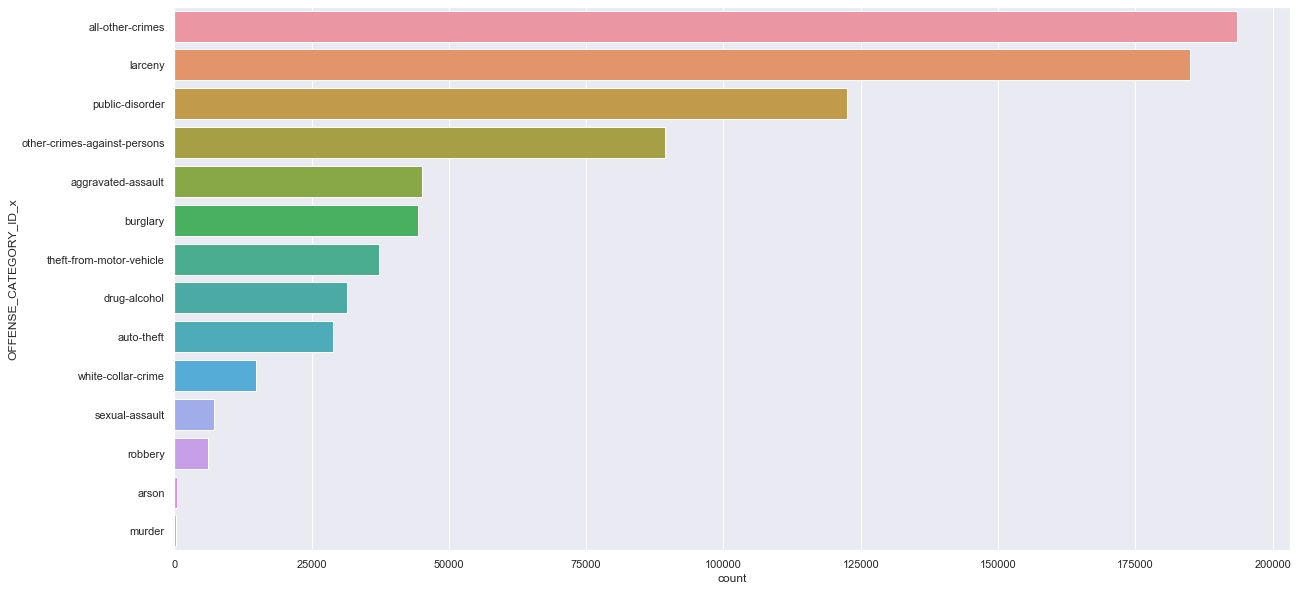

In [7]:
crime_and_codes = crime_and_codes[crime_and_codes.IS_CRIME_x != 0]
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='OFFENSE_CATEGORY_ID_x', data=crime_and_codes, order=crime_and_codes['OFFENSE_CATEGORY_ID_x'].value_counts().index)

Uit de tabel hierboven is duidelijk op te maken dat de categorieën 'all-other-crimes' en 'larceny' de meest voorkomende misdaadvormen zijn in Denver.
Om toch maar even te kijken hoe een bar chart met de OFFENSE_TYPE_ID_x eruit zou zien wordt die hieronder laten zien.

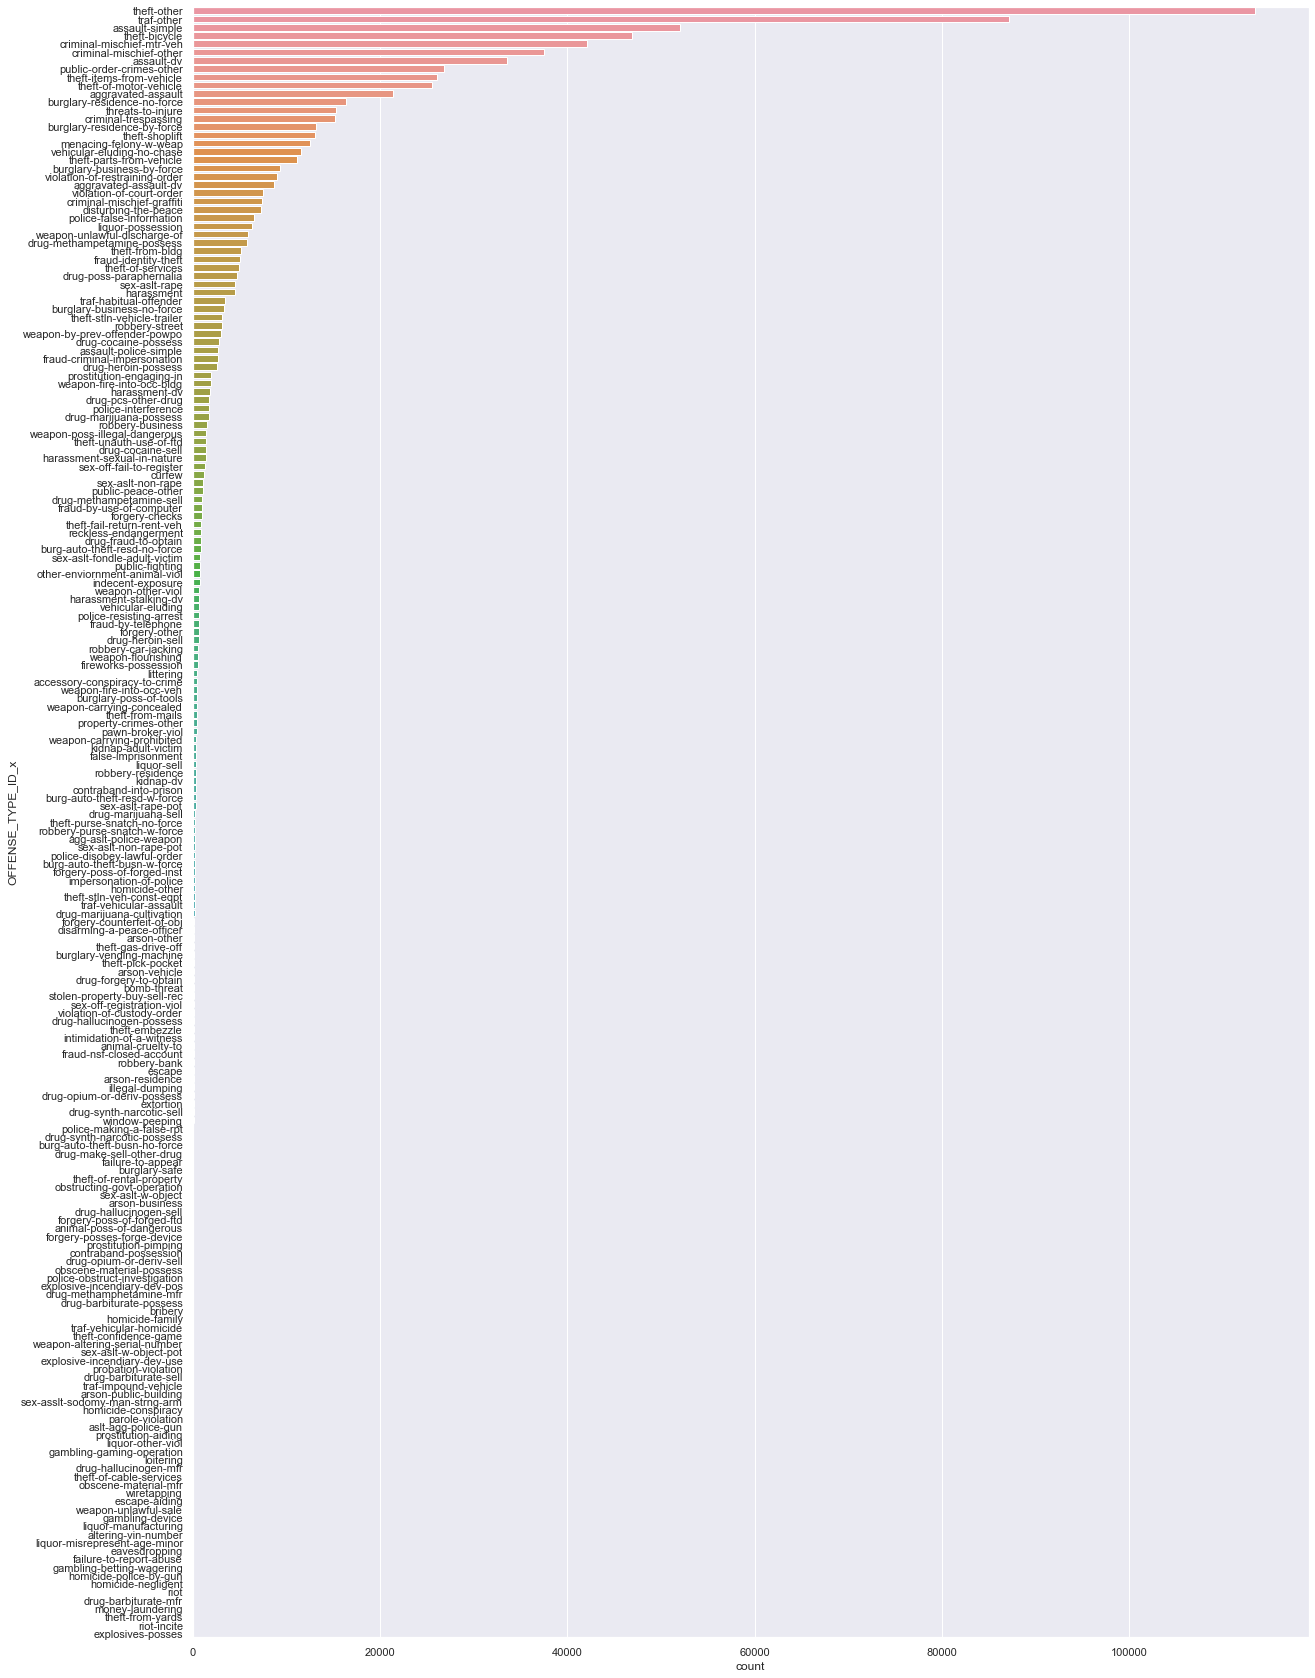

In [8]:
crime_and_codes = crime_and_codes[crime_and_codes.IS_CRIME_x != 0]
sns.set(rc={ 'figure.figsize':(20.0, 30.0)})
sns.countplot(y='OFFENSE_TYPE_ID_x', data=crime_and_codes, order=crime_and_codes['OFFENSE_TYPE_ID_x'].value_counts().index)

Zoals eerder al de verwachting was zijn er teveel verschillende OFFENSE_TYPE_IDs waardoor het enigszins onoverzichtelijk wordt, door de figuurgrootte aan te passen zijn de namen beter zichtbaar maar de bar chart is nog steeds te lang met teveel onderdelen om geen goed overzicht te kunnen geven. Een mogelijkheid om hieromheen te gaan is om per OFFENSE_TYPE_ID_x naar de OFFENSE_TYPE_ID_x te gaan kijken. 
Aangezien we in principe geen interesse hebben in misdaden die niet tot bijna niet voorkomen is het ook een optie om deze eruit te filteren. Dit zal echter wel als resultaat hebben dat niet alles meegerekent wordt wat er dus voor zou zorgen dat het antwoord op de eerder gestelde vraag minder betrouwbaar zal zijn.

In [9]:
#sns.set(style="ticks")
#sns.pairplot(crime_and_codes, x_vars=['REPORTED_DATE'],
#            y_vars=['OFFENSE_TYPE_ID_x'], kind='reg')
crime_and_codes['REPORTED_DATE'] = crime_and_codes['REPORTED_DATE'].str.split(' ').str[0]

In [10]:
crime_and_codes['REPORTED_DATE'] = crime_and_codes['REPORTED_DATE'].str[-4:]

In [11]:
indexNames = crime_and_codes[crime_and_codes['REPORTED_DATE']== '2020'].index
crime_and_codes.drop(indexNames, inplace=True)

In [12]:
crime_and_codes

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,REPORTED_DATE,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_TYPE_ID_y,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,2016,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
1,2016376978,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,2016,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,weapon-flourishing,Flourishing of a weapon,All Other Crimes
2,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,2018,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
3,201872599,201872599521300,5213,weapon-unlawful-discharge-of,all-other-crimes,2018,3185154.0,1711367.0,-104.841184,39.784667,5,521,montbello,1,0,weapon-flourishing,Flourishing of a weapon,All Other Crimes
4,201866465,201866465521300,5213,weapon-unlawful-discharge-of,all-other-crimes,2018,3189748.0,1714526.0,-104.824755,39.793246,5,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,All Other Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181904,2016245433,2016245433399000,3990,gambling-betting-wagering,white-collar-crime,2016,3144130.0,1694794.0,-104.987485,39.739897,6,611,civic-center,1,0,gambling-betting-wagering,Gambling - betting or wagering,White Collar Crime
1181905,2019356360,2019356360399000,3990,gambling-betting-wagering,white-collar-crime,2019,3144179.0,1694556.0,-104.987316,39.739243,6,623,capitol-hill,1,0,gambling-betting-wagering,Gambling - betting or wagering,White Collar Crime
1181906,2015649351,2015649351530300,5303,riot,public-disorder,2015,3144156.0,1694853.0,-104.987391,39.740059,6,611,civic-center,1,0,riot,Engaging in a riot,Public Disorder
1181907,20195003270,20195003270090700,907,homicide-police-by-gun,murder,2019,3129652.0,1694777.0,-105.038967,39.740064,1,122,west-colfax,1,0,homicide-police-by-gun,Homicide of a Police Officer w/gun,Murder


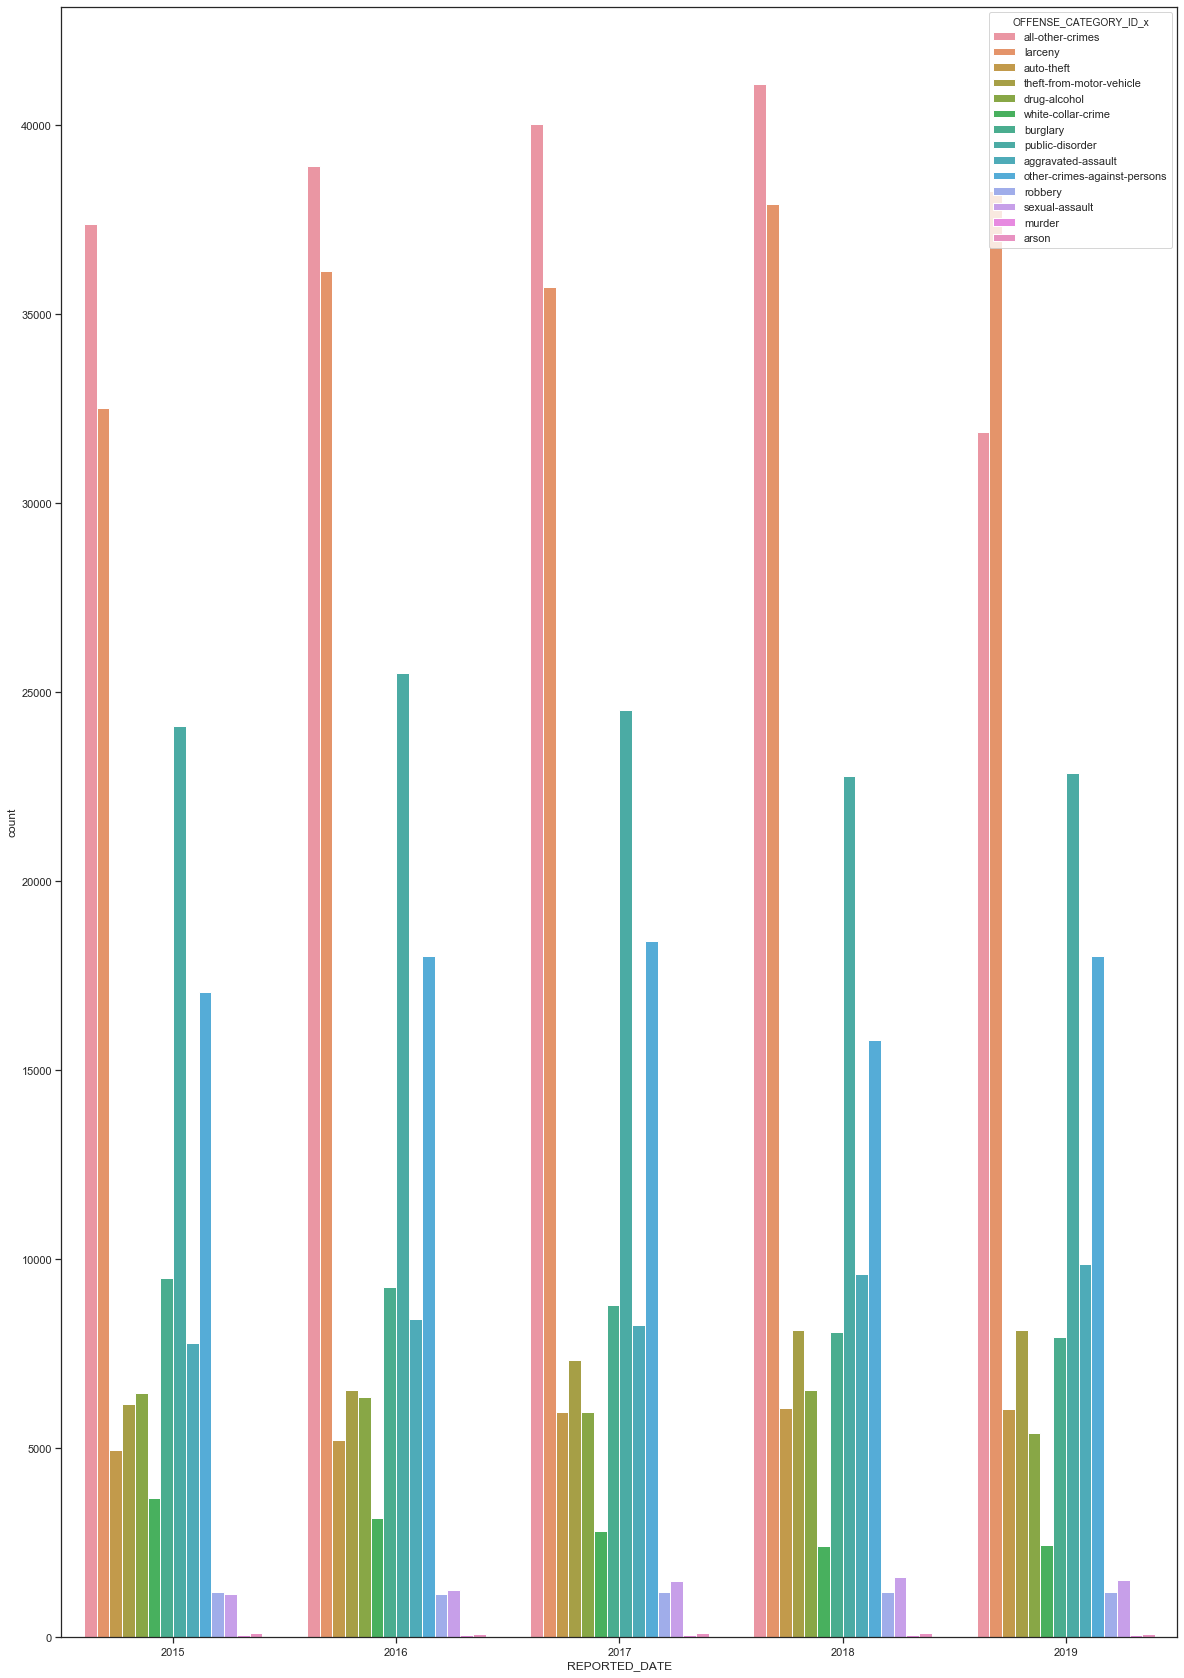

In [30]:
offenses = crime_and_codes['OFFENSE_TYPE_ID_x'].value_counts()
#sns.lineplot(data=offenses)
sns.set(style="ticks")
sns.countplot(x="REPORTED_DATE", hue="OFFENSE_CATEGORY_ID_x",
                  data=crime_and_codes)

In [14]:
#indexNames = crime[crime['REPORTED_DATE']== '2020'].index
theft_other = crime_and_codes.loc[crime_and_codes['OFFENSE_TYPE_ID_x'] == "theft-other"]
theft_other = theft_other.REPORTED_DATE.value_counts().reset_index()
sns.countplot(x= "REPORTED_DATE", hue=theft_other, data=crime_and_codes)

ValueError: could not broadcast input array from shape (5,2) into shape (5)